# Recurrent Neural Networks 

언어 모델링을 위한 RNN!

문장에 확률을 부여하는 확률적 모델을 맞추는 문제


h(t)=f(h(t−1),x(t);θ)
<hr>
입력 : x(t) (시점 t까지의 입력)

종합 : h(t) (정보 손실이 있는 종합된 내용)

이 과정을 통해 과거 정보에서 선택적으로 필요한 정보만 유지하여 조압한다. 예를 들어, RNN이 통계적 언어 모델링을 통해, 과거의 단어들을 바탕으로 다음에 나올 단어를 예측한다. 이를 위해, 시점 (time step) t까지 모든 입력을 다 기억할 필요는 없다. 일정한 정보만으로도 문장의 나머지 단어들을 예측하기에 충분하다. 


RNN을 그림으로 묘사하는 두가지 방법이 있다.

1. Folded graph: 모든 기능을 하나의 노드로만 표현.
2. Unfolded graph: 각 기능들이 각각의 노드로 표현. 

Unfolded 표현은 sequence 길이와 연관된 크기를 가진다.
<hr>
두가지 RNN 표현법은 다음과 같이 각자의 용도가 있다.

<h3>Folded graph (recurrent graph)</h3>

간단명료하다.

<h3>Unfolded graph</h3>

<br>
<li>각 단계에서 계산 수행을 분명하게 기술한다.</li>
<li>진행 방향에 따라 아이디어를 묘사하기 쉽다.</li>
<li>정보의 흐름 (Forward): output과 loss의 계산</li>
<li>정보의 흐름 (Backward): gradient 계산</li>


In [1]:
from IPython.display import Image

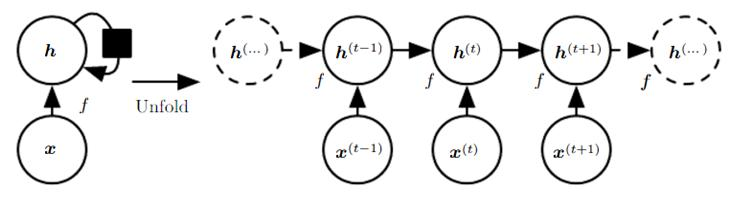

In [2]:
Image("RNN_IMAGES/image1.jpg")

## Recurrent Neural Networks(RNNs) 


<li>graph unrolling</li>
<li>parameter sharing</li>

을 통해 다양한 형태의 recurrent neural networks를 디자인할 수 있다.

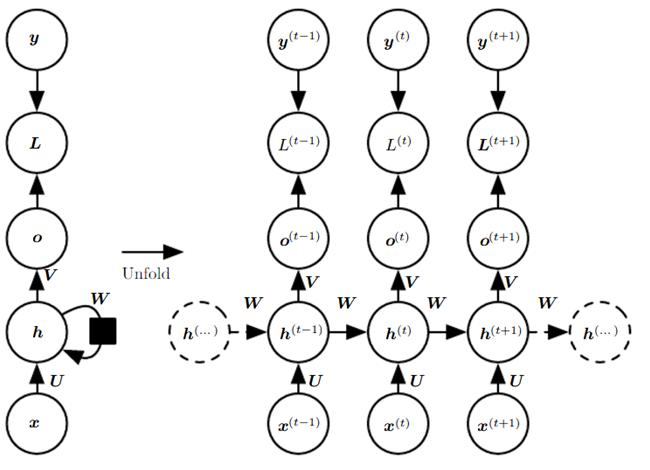

In [3]:
Image("RNN_IMAGES/image2.jpg")

Input (매 시점 t 마다), Output (매 시점 t 마다), Hidden (hidden unit간 연결)
<br>
(x,h),(h,o),(o,L),(L,y),(ht−1,ht) (여기서 (a, b)는 a와 b가 연결됨을 의미)

첫 번째 그림 같은 경우가 가장 일반적인 형태인데 activation function은 tanh로 두고 output은 discrete 값으로 가정한다. 그리고 RNN 모델은 단어나 문자를 예측하는데 사용된다고 가정

* output o는 각 이산값에 대해 정규화되지 않은 확률 분포로 나타낸다

* 최종 예측값 y^h은 출력 o에 대해 softmax()를 적용하여 정규화된 확률 값을 가진다.!

### Forward Propagation 

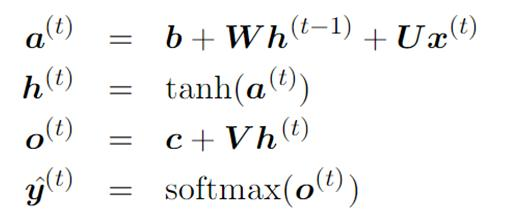

In [6]:
Image("RNN_IMAGES/image5.jpg")

### Loss 

이 모델은 입력 sequence와 출력 sequence의 길이가 동일하다. 전체 입,출력 sequence에 대한 loss는 각 시점(time steps)마다의 loss를 모두 더한 것과 같다.

L(t)가 입력 x(1), ..., x(t)이 주어졌을 때, 출력 y(t)에 대한 negative log-likelihood라고 하면 gradient를 계산하는 과정은 각 시점(time steps)에 대해 수행된다. 수행 시간은 O()이며 병렬처리가 불가능하다. 이 모델은 강력하지만 학습 과정에서 많은 계산량을 요구한다. 이를 Back-propagation through time 혹은 <strong>BPTT</strong>라고 한다.


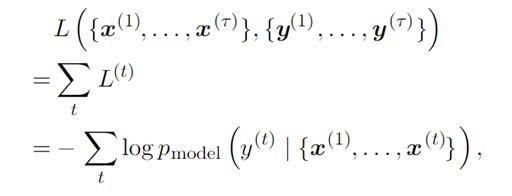

In [7]:
Image("RNN_IMAGES/image6.jpg")

## Teacher Forcing and Networks with Output Recurrence

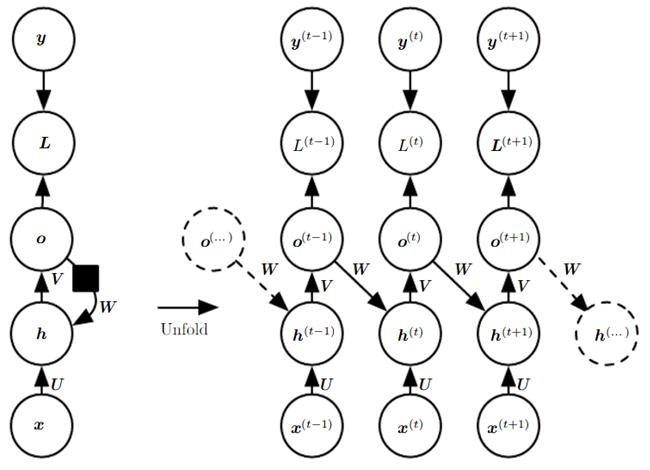

In [4]:
Image("RNN_IMAGES/image3.jpg")

Input (매 시점 t 마다), Output (매 시점 t 마다), Hidden-Output (hidden/output unit간 연결)
<br>
(x,h),(h,o),(o,L),(L,y),(ot−1,ht) (여기서 (a, b)는 a와 b가 연결됨을 의미)

두 번째 그림에서 보여주고 있는 RNN모델은 hidden-to-hidden 연결성이 부족하기 때무에 강력하지 않다. hidden-to-hidden 연결이 없기 때문에, output 유닛이 과거 네트워크의 모든 정보를 가지고 미래를 예측해야 한다. 그래서 output 유닛은 명백하게 학습 데이터의 타겟에 대해 학습된다. 사용자는 과거 모든 입력의 기록을 모아둘 필요가 없어진다?

hidden-to-hidden 연결을 제거함으로 얻는 이득은, 시작 t에서 예측하는 데 필요한 loss의 계산이 모든 시점 t에 대한 관계성이 없어진다. 따라서 학습 단계는 병렬처리 가능하며, 각 시점 t에서의 gradient 계산은 독립적으로 수행 가능하다.

output에서 바로 모델이 학습 하는 경우를 teacher forcing이라고 한다. 이는 maximu likelihood criterion을 따르며, ground truth y(t)가 t+1 시점의 입력으로 사용된다는 것을 의미.

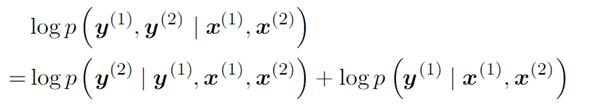

In [8]:
Image("RNN_IMAGES/image7.jpg")

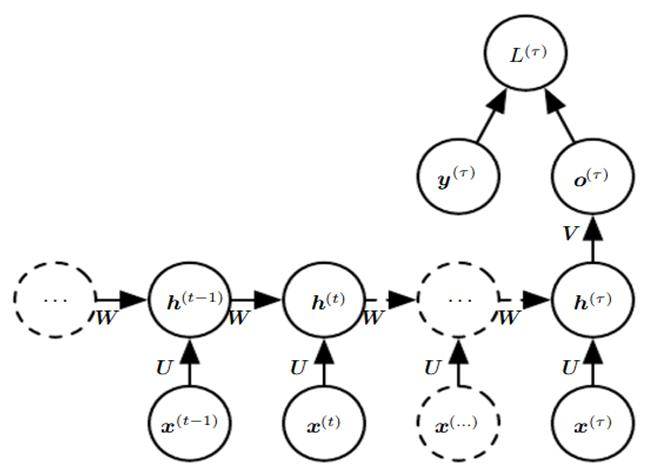

In [5]:
Image("RNN_IMAGES/image4.jpg")

Input (매 시점 t 마다), Output (최종 시점 
τ
τ에만), Hidden (hidden unit간 연결)
<br>
(x,h),(hτ,oτ),(oτ,Lτ),(Lτ,yτ) (여기서 (a, b)는 a와 b가 연결됨을 의미)

# RNNs in Tensorflow, A Practical Guide and Undocumented Features 

## 데이터 전처리: tf.SequenceExample 사용하기

Tensorflow는 순차적 데이터를 다루기 위해 프로토콜 버퍼가 정의되어 있다. Numpy 배열로부터 직접 데이터를 불러올 수도 있지만 tf.SequenceExample을 이용할 수 있다.

이 자료구조는

* 비순차적 특징(non-sequential features)은 "context"로
* 순차적 특징(sequential features)은 "feature_lists"로 구성

### 장점 

* 쉬운 분산 학습 : 데이터를 여러 개의 SequenceExamples을 포함하는 TFRecord 파일들로 나누고, Tensorflow에 탑재된 분산 학습 기능을 이용

* 재사용성(Reusability) : 다른 사용자들도 본인이 만든 모델을 가져다가 자신들의 데이터를 tf.SequenceExample 형태로 바꿔서 사용할 수 있다. (모델 코드 부분을 수정할 필요가 없다.)

* Tensorflow의 데이터 불러오기 파이프라인 함수 사용 : tf.parse_single_sequence_examlpe과 같이 사용 가능하다. tf.learn과 같은 라이브러리 역시 데이터 입력을 프로토콜 버퍼 포맷으로 입력될 것을 예상하여, 간편한 함수를 지원

* 데이터 전처리와 모델 코드의 분리 : tf.SequenceExample을 이용하게 되면, 사용자로 하여금 데이터 전처리와 Tensorflow 모델 코드 부분을 분리하도록 한다. 이것은 소스코드 작성에 매우 유익한 부분이며, 입력 데이터가 어떤 형태로 들어올지 가정하지 않아도 된다.

In [1]:
import tensorflow as tf
import numpy as np
import tempfile

1. 사용자의 데이터를 tf.SequenceExample 포맷으로 변환합니다.
2. serialized 데이터를 TFRecord로 하나 혹은 여러개 파일로 작성합니다.
3. tf.TFRecordReader를 이용하여 examples을 파일로부터 읽어옵니다.
4. 각 example을 tf.parse_single_sequence_example를 이용해 파싱합니다. (아직 공식 문서화되지 않은 기능입니다.)

In [2]:
sequences = [[1, 2, 3], [4, 5, 1], [1, 2]]
label_sequences = [[0, 1, 0], [1, 0, 0], [1, 1]]

def make_example(sequence, labels):
    # 결과값은 example
    ex = tf.train.SequenceExample()
    # A non-sequential feature (데이터를 설명하는 정보)
    sequence_length = len(sequence)
    ex.context.feature["length"].int64_list.value.append(sequence_length)
    # Feature lists (sequential features 실제 데이터)
    fl_tokens = ex.feature_lists.feature_list["tokens"]
    fl_labels = ex.feature_lists.feature_list["labels"]
    for token, label in zip(sequence, labels):
        fl_tokens.feature.add().int64_list.value.append(token)
        fl_labels.feature.add().int64_list.value.append(label)
    return ex

# 모든 examples을 하나의 TFRecord파일로 작성
with tempfile.NamedTemporaryFile() as fp:
    writer = tf.python_io.TFRecordWriter(fp.name)
    for sequence, label_sequence in zip(sequences, label_sequences):
        ex = make_example(sequence, label_sequence)
        writer.write(ex.SerializeToString())
    writer.close()
    print("Wrote to {}".format(fp.name))

Wrote to /tmp/tmp9z0dJD


In [14]:
ex = make_example([1, 2, 3], [0, 1, 0])

In [15]:
ex

context {
  feature {
    key: "length"
    value {
      int64_list {
        value: 3
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "labels"
    value {
      feature {
        int64_list {
          value: 0
        }
      }
      feature {
        int64_list {
          value: 1
        }
      }
      feature {
        int64_list {
          value: 0
        }
      }
    }
  }
  feature_list {
    key: "tokens"
    value {
      feature {
        int64_list {
          value: 1
        }
      }
      feature {
        int64_list {
          value: 2
        }
      }
      feature {
        int64_list {
          value: 3
        }
      }
    }
  }
}

In [3]:
tf.reset_default_graph()

# 하나의 serialized example
# (TFRecordReader를 이용하여 하나의 example을 읽어올 수 있다.)
ex = make_example([1, 2, 3], [0, 1, 0]).SerializeToString()

# example을 파싱하는 방식을 정의 (이름과 데이터 타입)
context_features = {
    "length": tf.FixedLenFeature([], dtype=tf.int64)
}
sequence_features = {
    "tokens": tf.FixedLenSequenceFeature([], dtype=tf.int64),
    "labels": tf.FixedLenSequenceFeature([], dtype=tf.int64)
}

# example로부터 파싱
context_parsed, sequence_parsed = tf.parse_single_sequence_example(
    serialized=ex,
    context_features=context_features,
    sequence_features=sequence_features
)

context = tf.contrib.learn.run_n(context_parsed, n=1, feed_dict=None)
print(context[0])
sequence = tf.contrib.learn.run_n(sequence_parsed, n=1, feed_dict=None)
print(sequence[0])

{'length': 3}
{'tokens': array([1, 2, 3]), 'labels': array([0, 1, 0])}


## Batching과 데이터 Padding 

Tensorflow의 RNN 함수는 [B,T, ...] 형태의 tensor를 입력으로 기대.
여기서 B는 배치 사이즈, T는 각 입력의 시간 길이를 의미(예를 들어 한 문장의 단어 수), 그리고 마지막 dimension은 사용자의 데이터와 관련 있다. 
<br>
여기서 모든 sequence들의 길이 T는 다 다를 것. 맞춰줘야 한다.

만약, 사용자의 sequence중 하나의 길이가 1000이라고 합시다. 하지만 sequences의 평균 길이가 20이라고 한다면 어떨까요? 만약 모든 example에 대해 길이 1000개에 맞춰서 padding을 하게 되면, 엄청난 공간 (뿐만 아니라 계산 시간)의 낭비가 발생합니다. 바로 여기서 batch padding이 필요합니다. 만약 사용자가 32개의 배치들을 만들었다면, 단지 각 배치에 있는 examples을 같은 크기 (해당 배치의 최대 길이의 example 크기에 맞춰서)로만 padding 시키면 되는 것입니다. 이 방식대로라면, 정말 긴 example은 오직 하나의 배치에만 영향을 미칩니다. 다른 모든 배치의 example 데이터들은 영향에서 벗어날 수 있습니다.

In [6]:
# Example with tf.train.batch dynamic padding
# ==================================================

tf.reset_default_graph()

# Create a tensor [0, 1, 2, 3, 4 ,...]
x = tf.range(1, 10, name="x")

# A queue that outputs 0,1,2,3,...
range_q = tf.train.range_input_producer(limit=5, shuffle=False)
slice_end = range_q.dequeue()

# Slice x to variable length, i.e. [0], [0, 1], [0, 1, 2], ....
y = tf.slice(x, [0], [slice_end], name="y")

print(y)

# Batch the variable length tensor with dynamic padding
batched_data = tf.train.batch(
    tensors=[y],
    batch_size=5,
    dynamic_pad=True,
    name="y_batch"
)

print(batched_data)

# Run the graph
# tf.contrib.learn takes care of starting the queues for us
res = tf.contrib.learn.run_n({"y": batched_data}, n=1, feed_dict=None)

# Print the result
print("Batch shape: {}".format(res[0]["y"].shape))
print(res[0]["y"])

Tensor("y:0", shape=(?,), dtype=int32)
Tensor("y_batch:0", shape=(5, ?), dtype=int32)
Batch shape: (5, 4)
[[0 0 0 0]
 [1 0 0 0]
 [1 2 0 0]
 [1 2 3 0]
 [1 2 3 4]]


In [8]:
# Example with PaddingFIFOQueue
# ==================================================

tf.reset_default_graph()

# Create a tensor [0, 1, 2, 3, 4 ,...]
x = tf.range(1, 10, name="x")

# A queue that outputs 0,1,2,3,...
range_q = tf.train.range_input_producer(limit=5, shuffle=False)
slice_end = range_q.dequeue()

# Slice x to variable length, i.e. [0], [0, 1], [0, 1, 2], ....
y = tf.slice(x, [0], [slice_end], name="y")

# Creating a new queue
padding_q = tf.PaddingFIFOQueue(
    capacity=10,
    dtypes=tf.int32,
    shapes=[[None]])

# Enqueue the examples
enqueue_op = padding_q.enqueue([y])

# Add the queue runner to the graph
qr = tf.train.QueueRunner(padding_q, [enqueue_op])
tf.train.add_queue_runner(qr)

# Dequeue padded data
batched_data = padding_q.dequeue_many(5)

print(batched_data)

# Run the graph
# tf.contrib.learn takes care of starting the queues for us
res = tf.contrib.learn.run_n({"y": batched_data}, n=1, feed_dict=None)

# Print the result
print("Batch shape: {}".format(res[0]["y"].shape))
print(res[0]["y"])

Tensor("padding_fifo_queue_DequeueMany:0", shape=(5, ?), dtype=int32)
Batch shape: (5, 4)
[[0 0 0 0]
 [1 0 0 0]
 [1 2 0 0]
 [1 2 3 0]
 [1 2 3 4]]


## RNN과 Dynamic_RNN 

Tensorflow는 두가지 종류의 RNNs을 제공하고 있습니다: tf.nn.rnn과 tf.nn.dynamic_rnn. 무엇을 사용할까요?

내부적으로, tf.nn.rnn은 고정된 길이를 가지는 RNN을 펼친 그래프를 생성합니다. 만약 200개의 시간 스텝을 입력으로 하여 tf.nn.rnn을 사용한다면, 200개의 RNN 스텝을 가지는 고정된 (static) 그래프가 만들어 집니다. 첫째, 그래프의 생성은 느립니다. 둘째, 원래 정의했던 길이보다 더 긴 길이 (200개 이상)의 sequence를 처리하지 못합니다.

tf.nn.dynamic_rnn은 이 문제들을 해결할 수 있습니다. tf.while loop를 이용하여, 실행될때 동적으로 그래프를 생성합니다. 이를 통해 빠르게 그래프를 생성하고, 다양한 길이의 배치들을 입력으로 처리 할 수 있습니다. 성능은 어떨까요? 일반적으로 생각하기에 static RNN이 그래프를 미리 생성해두기 때문에, dynamic RNN보다 빠를것이라고 생각합니다. 하지만, 제 경험상 그렇지 않았습니다.

간단히 얘기하면, 그냥 tf.nn.dynamic_rnn을 쓰세요. tf.nn.rnn을 사용해서 얻을수 있는 장점이 없습니다. tf.nn.rnn이 앞으로 사라져도 놀랍지 않습니다.

## Sequence 길이를 RNN에 전달하기 

Padding 된 입력을 Tensorflow의 RNN 함수들을 이용할 때, sequence_length 파라미터를 전달해 주는 것이 중요합니다. 개인적인 생각으로 이 파라미터는 선택적으로 쓰기보단, 필수적으로 꼭 사용하는게 좋습니다. sequence_length는 두가지 효과가 있습니다. 1. 계산시간을 절약해줍니다. 2. 정확함을 보장해줍니다.

## Bidirectional RNN 

우리는 각 단어에 대해서 왼쪽 단어 (과거) 뿐 아니라, 오른쪽 단어 (미래)도 같이 해당 단어의 품사를 예측하는데 사용하고 싶습니다. Bidirectional RNN이 정확하게 이 목적에 부합합니다. 
<hr>
Bidirectional RNN은 두개의 RNN을 결합한 형태입니다. 하나는 “왼쪽에서 오른쪽으로” 진행하는 것과 “오른쪽에서 왼쪽으로” 역행하는 것이죠. 이것은 태깅하는데 많이 사용되며, 하나의 시퀀스를 고정 길이 벡터로 끼워넣기 위해 사용됩니다. (이 포스트의 범위를 벗어난 내용입니다.)

In [9]:
tf.reset_default_graph()

# Create input data
X = np.random.randn(2, 10, 8)

# The second example is of length 6 
X[1,6:] = 0
X_lengths = [10, 6]

cell = tf.nn.rnn_cell.LSTMCell(num_units=64, state_is_tuple=True)

outputs, states  = tf.nn.bidirectional_dynamic_rnn(
    cell_fw=cell,
    cell_bw=cell,
    dtype=tf.float64,
    sequence_length=X_lengths,
    inputs=X)

output_fw, output_bw = outputs
states_fw, states_bw = states

result = tf.contrib.learn.run_n(
    {"output_fw": output_fw, "output_bw": output_bw, "states_fw": states_fw, "states_bw": states_bw},
    n=1,
    feed_dict=None)

print(result[0]["output_fw"].shape)
print(result[0]["output_bw"].shape)
print(result[0]["states_fw"].h.shape)
print(result[0]["states_bw"].h.shape)

(2, 10, 64)
(2, 10, 64)
(2, 64)
(2, 64)


## RNN Cells, Wrappers, Multi-layer RNNs 

In [12]:
tf.reset_default_graph()

# Create input data
X = np.random.randn(2, 10, 8)

# The second example is of length 6 
X[1,6,:] = 0
X_lengths = [10, 6]

cell = tf.nn.rnn_cell.LSTMCell(num_units=64, state_is_tuple=True)
cell = tf.nn.rnn_cell.DropoutWrapper(cell=cell, output_keep_prob=0.5)
cell = tf.nn.rnn_cell.MultiRNNCell(cells=[cell] * 4, state_is_tuple=True)

outputs, last_states = tf.nn.dynamic_rnn(
    cell=cell,
    dtype=tf.float64,
    sequence_length=X_lengths,
    inputs=X)

result = tf.contrib.learn.run_n(
    {"outputs": outputs, "last_states": last_states},
    n=1,
    feed_dict=None)


print(result[0]["outputs"].shape)
print(result[0]["outputs"])
assert result[0]["outputs"].shape == (2, 10, 64)

# Outputs for the second example past past length 6 should be 0
assert (result[0]["outputs"][1,7,:] == np.zeros(cell.output_size)).all()

print(result[0]["last_states"][0].h.shape)
print(result[0]["last_states"][0].h)

(2, 10, 64)
[[[  0.00000000e+00   7.76902373e-04  -1.24808923e-03 ...,   1.18046045e-04
    -3.61090404e-04   0.00000000e+00]
  [  0.00000000e+00   5.55366671e-05  -0.00000000e+00 ...,  -0.00000000e+00
    -0.00000000e+00   4.73271693e-03]
  [  0.00000000e+00  -2.18209667e-03  -0.00000000e+00 ...,  -0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  ..., 
  [  0.00000000e+00  -8.10330052e-03  -0.00000000e+00 ...,  -6.95880189e-03
    -0.00000000e+00  -0.00000000e+00]
  [  5.73853132e-02   0.00000000e+00  -0.00000000e+00 ...,  -1.61215456e-02
    -0.00000000e+00  -0.00000000e+00]
  [  0.00000000e+00   2.83969403e-02  -0.00000000e+00 ...,  -0.00000000e+00
    -1.34794821e-02  -2.83082897e-02]]

 [[  0.00000000e+00   3.82876493e-03   0.00000000e+00 ...,  -0.00000000e+00
    -8.73362389e-04  -0.00000000e+00]
  [ -0.00000000e+00   3.03767519e-03   0.00000000e+00 ...,  -6.92105990e-03
    -0.00000000e+00  -0.00000000e+00]
  [  2.82575647e-03   0.00000000e+00   1.74439859e-03 ...,  -3.364

## Padded example에 대해 Sequence loss 계산하기 

현재 sequence_loss는 dynamic_rnn으로 부터 얻어지는 가변 길이 sequence에 대해 지원하지 않습니다. padding을 통해 sequence길이를 맞춘 뒤, 각 타임 스텝마다 그리고 padded 위치에서 loss를 계산한 다는 것은 무의미합니다. 해결책은 padded된 위치에 대해 마스킹 처리하는 가중치 행렬을 만드는겁니다.

아래에서 0-class를 사용할 경우, 왜 0-padding이 문제가 되는지 볼 수 있습니다. 만약 마스크를 만들기 위해 tf.sign(tf.to_float(y))을 사용할 때, “0-class”도 마스킹 처리되서 없어져버리는 경우가 발생합니다. 이를 방지하기 위해 sequence 길이 정보를 이용해 마스크를 만들수도 있지만, 훨씬 더 복잡해집니다.

In [13]:
tf.reset_default_graph()

tf.set_random_seed(10)
np.random.seed(10)

# Batch size
B = 4
# (Maximum) number of time steps in this batch
T = 8
RNN_DIM = 128
NUM_CLASSES = 10

# The *acutal* length of the examples
example_len = [1, 2, 3, 8]

# The classes of the examples at each step (between 1 and 9, 0 means padding)
y = np.random.randint(1, 10, [B, T])
for i, length in enumerate(example_len):
    y[i, length:] = 0   
    
# The RNN outputs
rnn_outputs = tf.convert_to_tensor(np.random.randn(B, T, RNN_DIM), dtype=tf.float32)

# Output layer weights
W = tf.get_variable(
    name="W",
    initializer=tf.random_normal_initializer(),
    shape=[RNN_DIM, NUM_CLASSES])

# Calculate logits and probs
# Reshape so we can calculate them all at once
rnn_outputs_flat = tf.reshape(rnn_outputs, [-1, RNN_DIM])
logits_flat = tf.batch_matmul(rnn_outputs_flat, W)
probs_flat = tf.nn.softmax(logits_flat)

# Calculate the losses 
y_flat =  tf.reshape(y, [-1])
losses = tf.nn.sparse_softmax_cross_entropy_with_logits(logits_flat, y_flat)

# Mask the losses
mask = tf.sign(tf.to_float(y_flat))
masked_losses = mask * losses

# Bring back to [B, T] shape
masked_losses = tf.reshape(masked_losses,  tf.shape(y))

# Calculate mean loss
mean_loss_by_example = tf.reduce_sum(masked_losses, reduction_indices=1) / example_len
mean_loss = tf.reduce_mean(mean_loss_by_example)

result = tf.contrib.learn.run_n(
    {
        "masked_losses": masked_losses,
        "mean_loss_by_example": mean_loss_by_example,
        "mean_loss": mean_loss
    },
    n=1,
    feed_dict=None)

print(result[0]["masked_losses"])
print(result[0]["mean_loss_by_example"])
print(result[0]["mean_loss"])

[[ 19.3765831    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.29494482  25.95082092   0.           0.           0.           0.
    0.           0.        ]
 [ 25.2746582    5.78165054   9.9505682    0.           0.           0.
    0.           0.        ]
 [ 24.15919495   8.90028667   9.38859081  24.47133827   1.11007929
    3.17366886   0.49285793  24.88559151]]
[ 19.3765831   13.12288284  13.66895962  12.0727005 ]
14.5603
